In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('household_power_consumption.txt',sep=';')

C:\Users\LOKESHRAJ K P\AppData\Local\Temp\ipykernel_12468\2264859386.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('household_power_consumption.txt',sep=';')


In [2]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sub_metering_3,2049280.0,6.458447,8.437154,0.0,0.0,1.0,17.0,31.0


In [5]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Global_active_power'].unique()

array(['4.216', '5.360', '5.374', ..., 4.068, 3.94, 3.74], dtype=object)

In [8]:
df.shape

(2075259, 9)

In [9]:
df_sample=df.sample(20000,replace=False)

In [10]:
df_sample=df_sample.reset_index()

In [11]:
df_sample.drop('index',axis=1,inplace=True)

In [12]:
df_sample.shape

(20000, 9)

In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   20000 non-null  object 
 1   Time                   20000 non-null  object 
 2   Global_active_power    20000 non-null  object 
 3   Global_reactive_power  20000 non-null  object 
 4   Voltage                20000 non-null  object 
 5   Global_intensity       20000 non-null  object 
 6   Sub_metering_1         20000 non-null  object 
 7   Sub_metering_2         20000 non-null  object 
 8   Sub_metering_3         19730 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [14]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,15/2/2009,07:59:00,1.266,0.058,242.420,5.200,0.000,0.000,0.0
1,15/9/2009,22:49:00,1.882,0.316,243.500,7.800,0.000,2.000,1.0
2,23/6/2007,23:23:00,0.138,0.000,241.240,0.600,0.000,0.000,0.0
3,4/9/2009,20:56:00,1.590,0.292,241.710,6.600,0.000,1.000,1.0
4,5/9/2009,22:47:00,0.460,0.106,243.840,2.000,0.000,1.000,1.0


In [15]:
df_sample['Date'].unique()

array(['15/2/2009', '15/9/2009', '23/6/2007', ..., '31/7/2009',
       '16/12/2006', '10/4/2008'], dtype=object)

In [16]:
df_sample['Time'].unique()

array(['07:59:00', '22:49:00', '23:23:00', ..., '18:51:00', '08:58:00',
       '15:16:00'], dtype=object)

In [17]:
df_sample.to_csv('sample_data.csv')

In [18]:
for feature in [feature for feature in df_sample.columns if feature not in ['Date','Time']]:
    print(df_sample[feature].unique())

['1.266' '1.882' '0.138' ... 2.288 '5.946' '5.224']
['0.058' '0.316' '0.000' '0.292' '0.106' '0.074' '0.180' '0.146' '0.212'
 '0.050' '0.228' '0.278' '0.196' '0.108' '0.090' '0.064' '0.068' '0.158'
 '0.054' '?' '0.162' '0.086' '0.098' '0.222' '0.066' '0.092' '0.170'
 '0.122' '0.282' '0.100' '0.262' '0.246' '0.080' 0.304 '0.238' '0.294'
 '0.046' '0.224' '0.132' '0.354' '0.130' '0.104' '0.356' '0.156' '0.200'
 '0.134' '0.318' 0.0 '0.166' '0.164' '0.056' '0.252' '0.126' '0.150'
 '0.400' '0.232' '0.236' '0.234' '0.116' '0.332' '0.402' '0.148' '0.230'
 '0.096' '0.076' '0.070' '0.190' '0.120' '0.088' '0.214' '0.220' '0.144'
 '0.410' '0.142' '0.072' '0.346' '0.062' '0.048' '0.208' '0.140' '0.424'
 '0.276' '0.194' '0.310' '0.244' '0.182' '0.240' '0.052' 0.078 '0.124'
 '0.216' '0.118' '0.078' '0.060' '0.218' '0.114' '0.084' '0.198' '0.280'
 '0.202' '0.256' 0.15 '0.168' '0.264' '0.184' '0.390' 0.204 '0.094'
 '0.304' '0.188' '0.102' 0.062 0.668 0.09 '0.082' '0.174' '0.342' '0.258'
 '0.382' '0.110

In [19]:
#checking how many records have ''?'' in it
for feature in [feature for feature in df_sample.columns if feature not in ['Date','Time']]:
    print(df_sample[df_sample[feature]=='?'].shape)

(270, 9)
(270, 9)
(270, 9)
(270, 9)
(270, 9)
(270, 9)
(0, 9)


In [20]:
# replacing '?'with nan
df_sample.replace('?',np.nan,inplace=True)

In [21]:
#for feature in [feature for feature in df_sample.columns if feature not in ['Date','Time']]:
     #df_sample.drop(df_sample.loc[df_sample[feature]=='?'].index,inplace=True)

In [22]:
#for feature in [feature for feature in df_sample.columns if feature not in ['Date','Time']]:
   # print(df_sample[df_sample[feature]=='?'].shape)

In [23]:
df_sample[df_sample[feature]=='?'].shape

(0, 9)

In [24]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   20000 non-null  object 
 1   Time                   20000 non-null  object 
 2   Global_active_power    19730 non-null  object 
 3   Global_reactive_power  19730 non-null  object 
 4   Voltage                19730 non-null  object 
 5   Global_intensity       19730 non-null  object 
 6   Sub_metering_1         19730 non-null  object 
 7   Sub_metering_2         19730 non-null  object 
 8   Sub_metering_3         19730 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [25]:
for feature in [feature for feature in df_sample.columns if feature not in ['Date','Time']]:
    df_sample[feature]=df_sample[feature].astype('float64')


In [26]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   20000 non-null  object 
 1   Time                   20000 non-null  object 
 2   Global_active_power    19730 non-null  float64
 3   Global_reactive_power  19730 non-null  float64
 4   Voltage                19730 non-null  float64
 5   Global_intensity       19730 non-null  float64
 6   Sub_metering_1         19730 non-null  float64
 7   Sub_metering_2         19730 non-null  float64
 8   Sub_metering_3         19730 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.4+ MB


In [27]:
df_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power      270
Global_reactive_power    270
Voltage                  270
Global_intensity         270
Sub_metering_1           270
Sub_metering_2           270
Sub_metering_3           270
dtype: int64

In [28]:
df_sample['Date']=pd.to_datetime(df_sample['Date'],format="%d/%m/%Y")

In [29]:
df_sample['Time'] = pd.to_datetime(df_sample['Time'],format='%H:%M:%S').dt.time

In [30]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   20000 non-null  datetime64[ns]
 1   Time                   20000 non-null  object        
 2   Global_active_power    19730 non-null  float64       
 3   Global_reactive_power  19730 non-null  float64       
 4   Voltage                19730 non-null  float64       
 5   Global_intensity       19730 non-null  float64       
 6   Sub_metering_1         19730 non-null  float64       
 7   Sub_metering_2         19730 non-null  float64       
 8   Sub_metering_3         19730 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.4+ MB


In [31]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-02-15,07:59:00,1.266,0.058,242.42,5.2,0.0,0.0,0.0
1,2009-09-15,22:49:00,1.882,0.316,243.50,7.8,0.0,2.0,1.0
2,2007-06-23,23:23:00,0.138,0.000,241.24,0.6,0.0,0.0,0.0
3,2009-09-04,20:56:00,1.590,0.292,241.71,6.6,0.0,1.0,1.0
4,2009-09-05,22:47:00,0.460,0.106,243.84,2.0,0.0,1.0,1.0


In [32]:
# target variable
df_sample['Target']=df_sample['Sub_metering_1']+df_sample['Sub_metering_2']+df_sample['Sub_metering_3']

In [33]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Target
0,2009-02-15,07:59:00,1.266,0.058,242.42,5.2,0.0,0.0,0.0,0.0
1,2009-09-15,22:49:00,1.882,0.316,243.50,7.8,0.0,2.0,1.0,3.0
2,2007-06-23,23:23:00,0.138,0.000,241.24,0.6,0.0,0.0,0.0,0.0
3,2009-09-04,20:56:00,1.590,0.292,241.71,6.6,0.0,1.0,1.0,2.0
4,2009-09-05,22:47:00,0.460,0.106,243.84,2.0,0.0,1.0,1.0,2.0


In [34]:
df_sample['Target'].head()

0    0.0
1    3.0
2    0.0
3    2.0
4    2.0
Name: Target, dtype: float64

In [35]:
df_sample['Target'].shape

(20000,)

In [36]:
df_sample=df_sample.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [37]:
df_sample.shape

(20000, 7)

In [38]:
df_sample.duplicated().sum()

0

In [39]:
## Mongodb


In [40]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Target
0,2009-02-15,07:59:00,1.266,0.058,242.42,5.2,0.0
1,2009-09-15,22:49:00,1.882,0.316,243.50,7.8,3.0
2,2007-06-23,23:23:00,0.138,0.000,241.24,0.6,0.0
3,2009-09-04,20:56:00,1.590,0.292,241.71,6.6,2.0
4,2009-09-05,22:47:00,0.460,0.106,243.84,2.0,2.0


In [41]:
df_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power      270
Global_reactive_power    270
Voltage                  270
Global_intensity         270
Target                   270
dtype: int64

In [42]:
df_sample.dropna(inplace=True)

In [43]:
x=df_sample.iloc[:,2:-1]
y=df_sample.iloc[:,-1]

In [44]:
x.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,1.266,0.058,242.42,5.2
1,1.882,0.316,243.50,7.8
2,0.138,0.000,241.24,0.6
3,1.590,0.292,241.71,6.6
4,0.460,0.106,243.84,2.0


In [45]:
y.head()

0    0.0
1    3.0
2    0.0
3    2.0
4    2.0
Name: Target, dtype: float64

In [46]:
df_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Target                   0
dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
298,1.828,0.000,236.01,7.6
13843,1.262,0.118,240.05,5.2
2405,0.462,0.088,235.07,2.0
11017,1.820,0.256,244.39,8.0
2082,2.240,0.060,236.39,9.4


In [49]:
y_train.head()

298       0.0
13843     1.0
2405      0.0
11017    20.0
2082     17.0
Name: Target, dtype: float64

In [50]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()


In [51]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
model.score(X_train,y_train)

0.9999981936135478

In [53]:
y_predict=model.predict(X_test)

In [54]:
y_predict

array([ 3., 18.,  3., ...,  0., 16.,  2.])

In [55]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(y_test,y_predict)

0.5568481266369503

[Text(0.5, 0.9166666666666666, 'X[0] <= 1.183\nsquared_error = 167.014\nsamples = 13811\nvalue = 8.897'),
 Text(0.25, 0.75, 'X[0] <= 0.829\nsquared_error = 5.133\nsamples = 8067\nvalue = 1.16'),
 Text(0.125, 0.5833333333333334, 'X[1] <= 0.153\nsquared_error = 1.255\nsamples = 7424\nvalue = 0.82'),
 Text(0.0625, 0.4166666666666667, 'X[3] <= 2.9\nsquared_error = 1.002\nsamples = 5405\nvalue = 0.633'),
 Text(0.03125, 0.25, 'X[1] <= 0.065\nsquared_error = 0.603\nsamples = 5221\nvalue = 0.59'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'X[1] <= 0.089\nsquared_error = 10.792\nsamples = 184\nvalue = 1.848'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'X[3] <= 3.3\nsquared_error = 1.589\nsamples = 2019\nvalue = 1.32'),
 Text(0.15625, 0.25, 'X[1] <= 0.249\nsquared_error = 1.172\nsamples = 1939\nvalue = 1.261

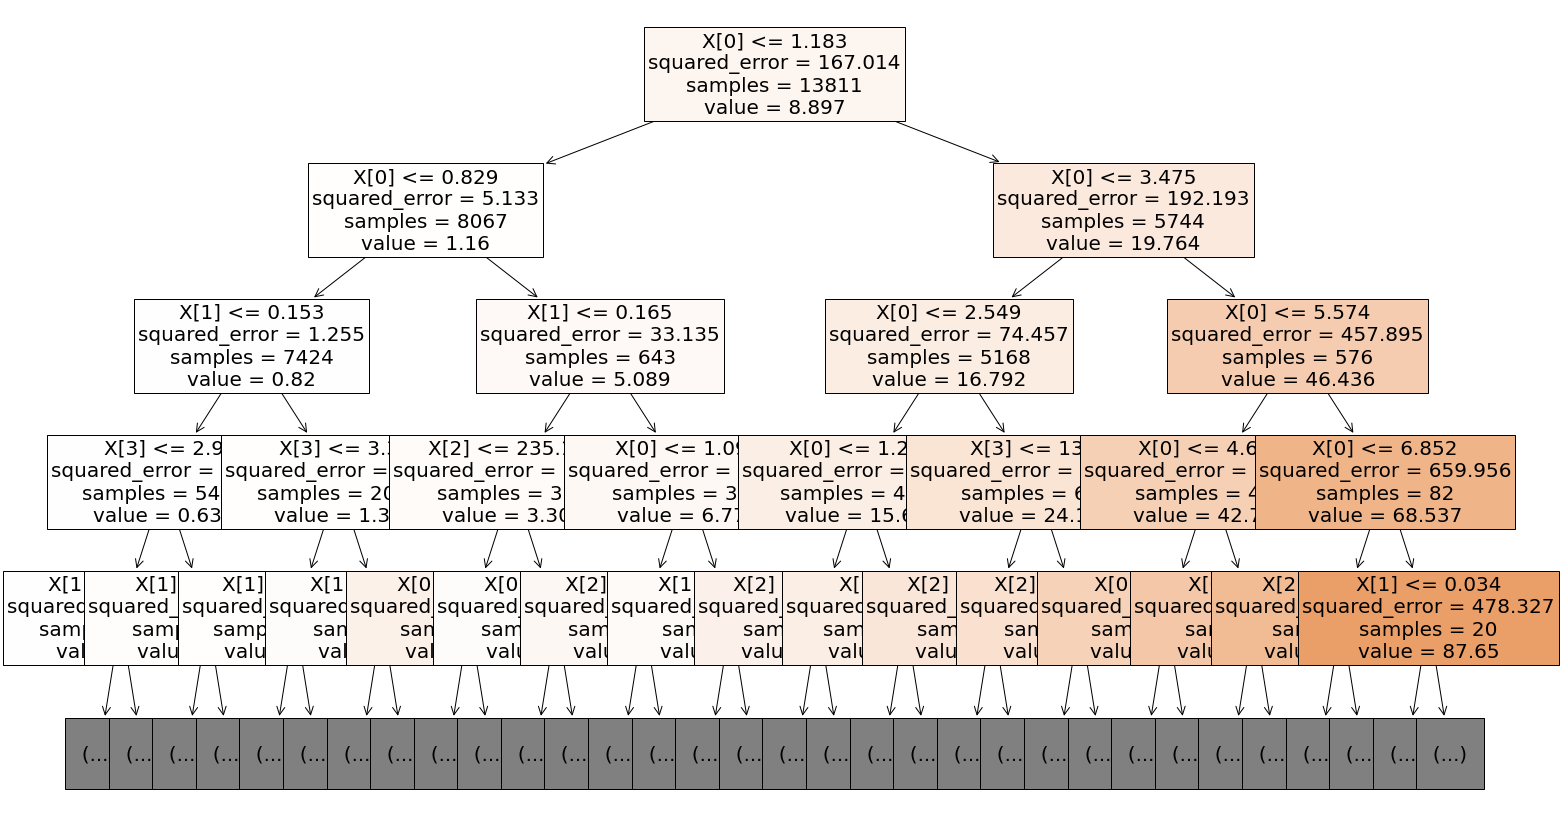

In [80]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,max_depth=4,filled=True,fontsize=20)

In [81]:
from sklearn.model_selection import GridSearchCV
grid_params={'criterion':['squared_error'], 'splitter':['best','random'],'max_depth':range(2,10,1),'min_samples_split':range(2,8,1),'min_samples_leaf':range(2,8,1)}

In [82]:
grid_search=GridSearchCV(estimator=model,param_grid=grid_params,cv=5,verbose=2)

In [83]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=2)

In [84]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'splitter': 'random'}

In [85]:
model_with_best_params=DecisionTreeRegressor(criterion='squared_error',max_depth=7,min_samples_leaf=5,min_samples_split=6,splitter='random')

In [86]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=6,
                      splitter='random')

In [87]:
model_with_best_params.score(X_train,y_train)

0.76306380972842

In [88]:
y_pred1=model_with_best_params.predict(X_test)

In [89]:
r2_score(y_test,y_pred1)

0.746955793097148

[Text(0.5225409836065574, 0.9166666666666666, 'X[3] <= 5.413\nsquared_error = 167.014\nsamples = 13811\nvalue = 8.897'),
 Text(0.26229508196721313, 0.75, 'X[3] <= 2.576\nsquared_error = 21.731\nsamples = 8754\nvalue = 2.228'),
 Text(0.13114754098360656, 0.5833333333333334, 'X[1] <= 0.182\nsquared_error = 0.718\nsamples = 6688\nvalue = 0.737'),
 Text(0.06557377049180328, 0.4166666666666667, 'X[1] <= 0.128\nsquared_error = 0.581\nsamples = 5284\nvalue = 0.598'),
 Text(0.03278688524590164, 0.25, 'X[1] <= 0.085\nsquared_error = 0.534\nsamples = 4676\nvalue = 0.568'),
 Text(0.01639344262295082, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.04918032786885246, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09836065573770492, 0.25, 'X[1] <= 0.168\nsquared_error = 0.876\nsamples = 608\nvalue = 0.832'),
 Text(0.08196721311475409, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.11475409836065574, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.19672131147540983, 0.4166666666666667, 'X[1] <= 0.196\

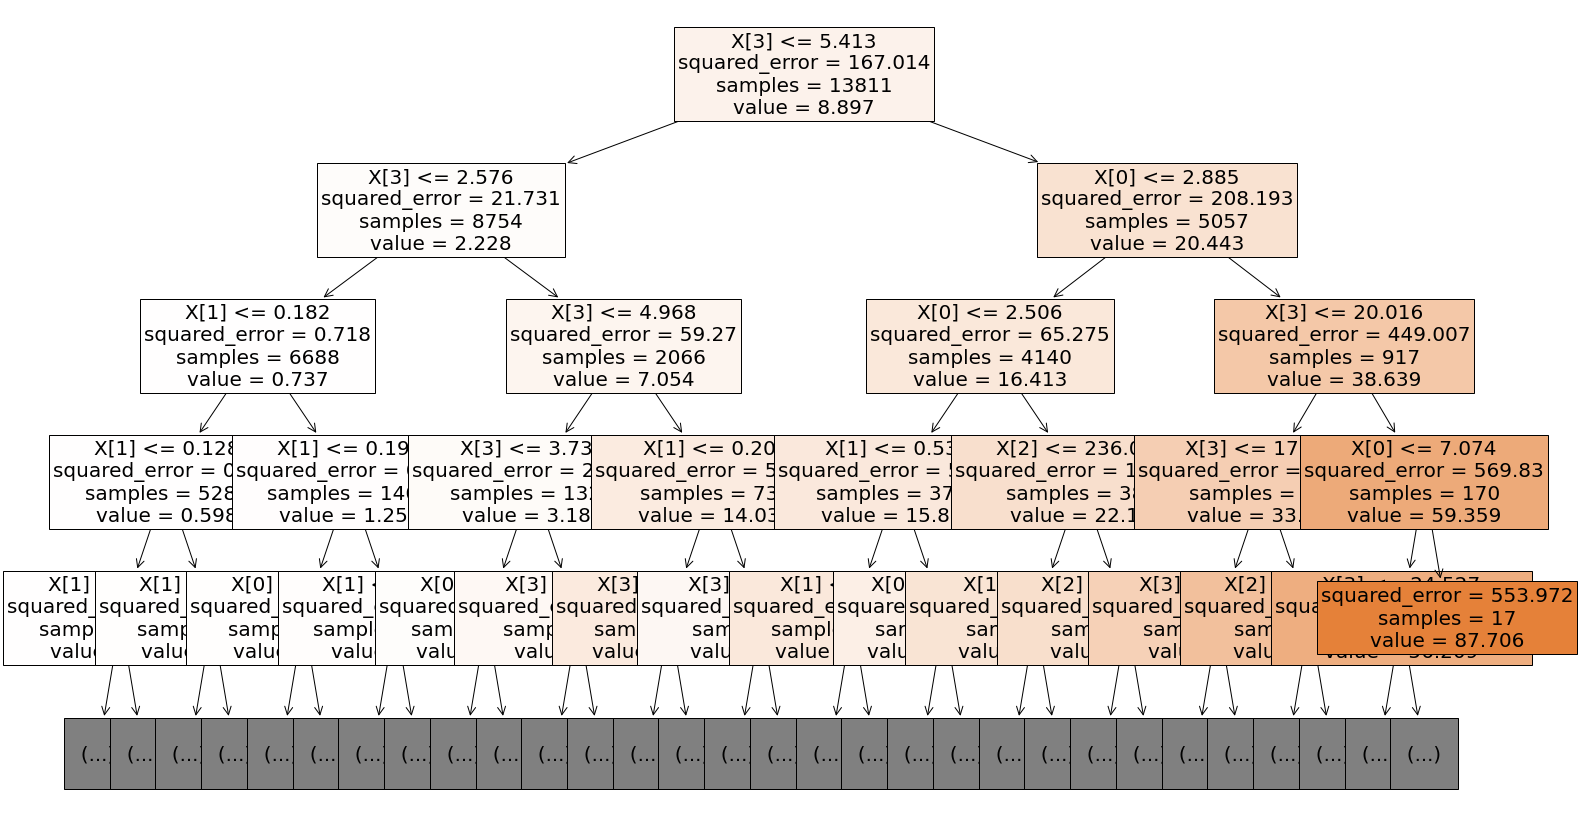

In [90]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,max_depth=4,filled=True,fontsize=20)

### Conclusion
##### after hyper parameter tuning,accuracy increased from 55 % to 75%